In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Reading Data

In [6]:
data = pd.read_csv('/content/Sales.csv')

In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data.shape

(200, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Drop the Column

In [11]:
data=data.drop(columns=["Unnamed: 0"])

In [12]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
data[['TV','Radio','Newspaper']] = scaler.fit_transform(data[['TV','Radio','Newspaper']])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
SEED = 42
X = data.drop(['Sales'], axis=1)
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=SEED)

In [51]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

1.4607567168117601
3.174097353976106


In [54]:
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : y_pred,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627


In [56]:
import seaborn as sns

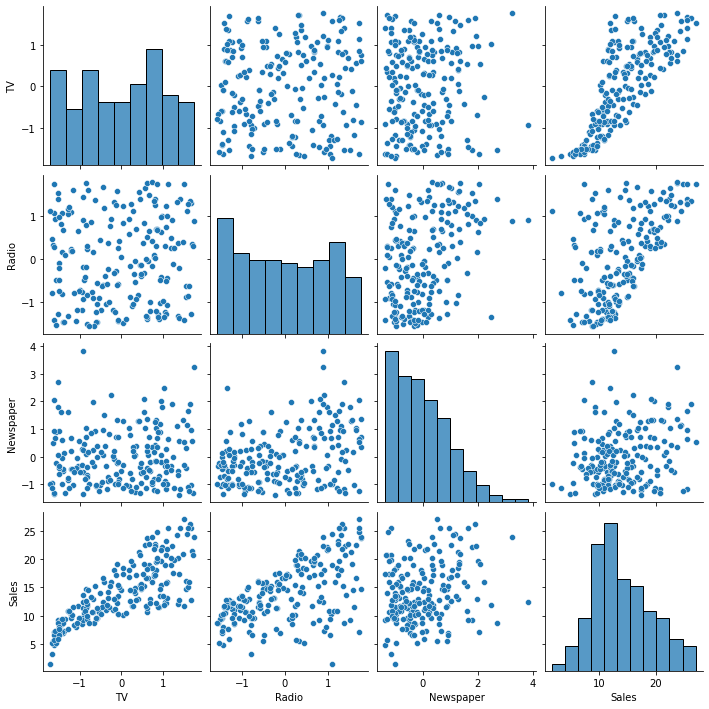

In [58]:
sns.pairplot(data)
plt.show()

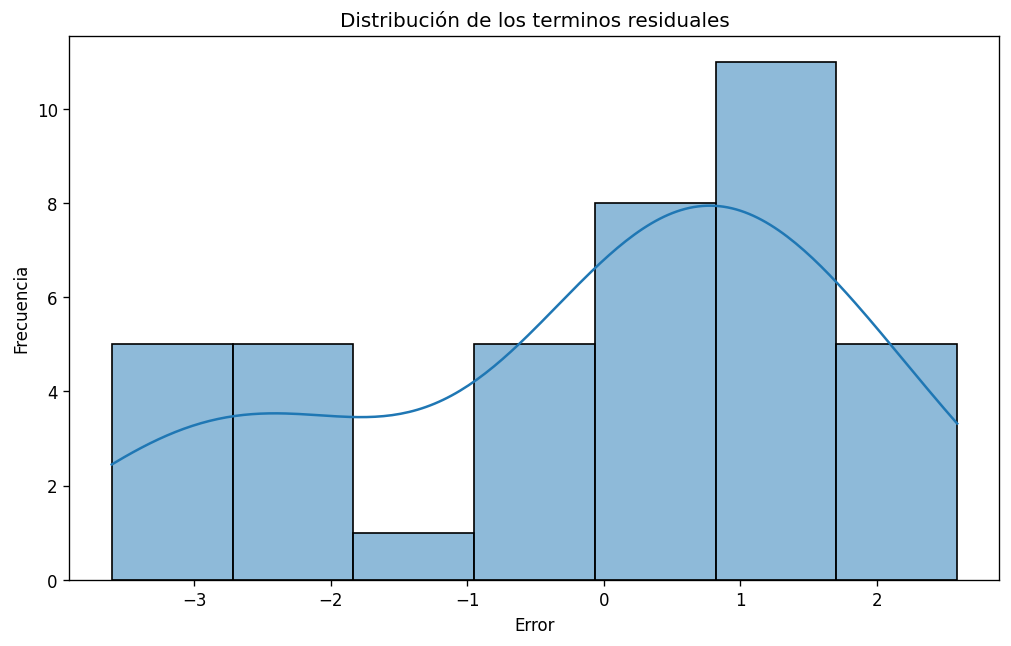

In [61]:
#Histograma para distribucion
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
sns.histplot(residuals.residuals, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de los terminos residuales')
plt.show()

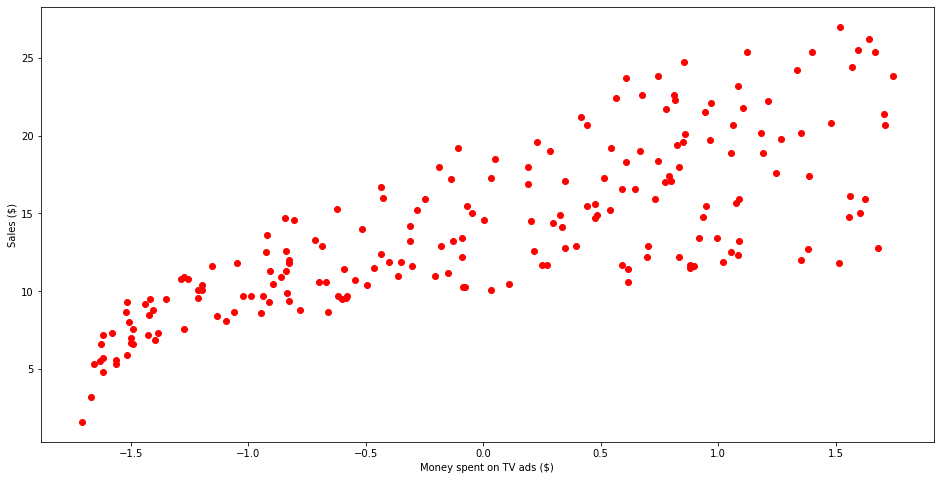

In [59]:
plt.figure(figsize=(16,8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='red'
)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales ($)')
plt.show()

In [40]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, y)

print("The linear model is: Y = {:.5} + {:.5}X".format(lr.intercept_[0], lr.coef_[0][0]))

The linear model is: Y = 7.0326 + 0.047537X


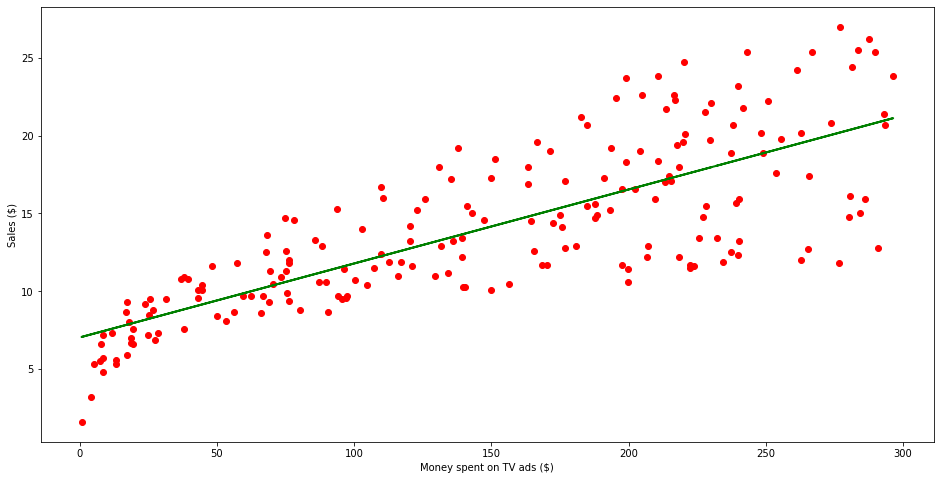

In [43]:
predictions = lr.predict(X)

plt.figure(figsize=(16, 8))

plt.scatter(
    data['TV'],
    data['Sales'],
    c='red'
)

plt.plot(
    data['TV'],
    predictions,
    c='green',
    linewidth=2
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [44]:
def predict_sales_value(tv_ads_value):
    return 7.0326 + (0.047537 * tv_ads_value)

In [46]:
predict_sales_value(200.1)

16.5447537